In [21]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [63]:
features_df=pd.read_csv('data/features.csv')
store_df=pd.read_csv('data/stores.csv')
sales_df=pd.read_csv('data/train.csv')

In [66]:
print(features_df.info(),store_df.info(),sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column

In [70]:
features_df["Date"] = pd.to_datetime(features_df["Date"])
sales_df["Date"] = pd.to_datetime(sales_df["Date"])
#we cant test\train on data later than 2012-10-26 so for this excersize it is useless
last_Date = sales_df.Date.max()
features_df = features_df[features_df["Date"]<=last_Date]

In [71]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 8150
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Temperature   6435 non-null   float64       
 3   Fuel_Price    6435 non-null   float64       
 4   MarkDown1     2280 non-null   float64       
 5   MarkDown2     1637 non-null   float64       
 6   MarkDown3     2046 non-null   float64       
 7   MarkDown4     1965 non-null   float64       
 8   MarkDown5     2295 non-null   float64       
 9   CPI           6435 non-null   float64       
 10  Unemployment  6435 non-null   float64       
 11  IsHoliday     6435 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 609.6 KB


In [72]:
features_df.MarkDown5.value_counts(dropna=False)
#seems like theres no 0's in MarkDowns so we wont lose any information turning Nan into 0's but is it the right choice 

NaN        4140
1064.56       2
2743.18       2
492.36        1
755.80        1
           ... 
3154.77       1
1941.32       1
2862.32       1
1610.18       1
858.33        1
Name: MarkDown5, Length: 2294, dtype: int64

In [73]:
features_df["isNAn"] = features_df["MarkDown4"].isna()
#we will take MarkDown4 as a sample since the Data in other MarkDowns is similiar on other MarkDown columns

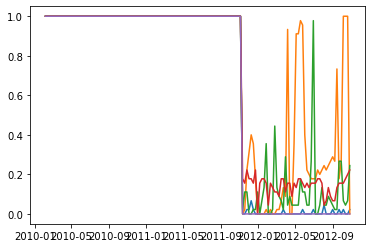

In [74]:
fig, ax = plt.subplots() 
for i in [1,2,3,4,5]:
    features_df["isNAn"] = features_df["MarkDown" + str(i)].isna()
    #fig, ax = plt.subplots()
    ax.plot(features_df.groupby("Date").isNAn.agg("mean"))

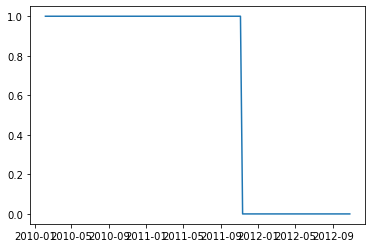

In [75]:
fig, ax = plt.subplots() 
ax.plot(features_df.groupby("Date").isNAn.agg("mean"))
#seems like they started tracking the markdowns only from a certain date thus 0 doesnt have a particular meaning 
#either take average markdown or not use markdowns(not ideal)
#if theres hope to get more markdown Data at the fututre to train on we would have used it but this time its better to use more data

In [78]:
#drop markdowns
markdowns = ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5",]
features_df = features_df.drop (columns = markdowns)

**after doing immediate changes we will merge our data into one table**

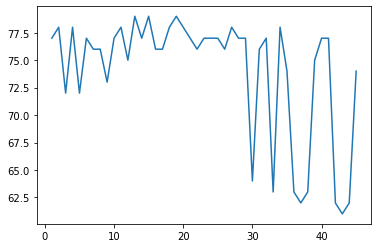

In [92]:
#first look at sales_df departments
fig, ax = plt.subplots() 
ax.plot(sales_df.groupby("Store").Dept.agg("nunique"))
#we can see not all stores have the same number or even the same departments
#we would want to predict the sales in each department

In [106]:
Df=pd.merge(sales_df,features_df,how="outer",on=["Store","Date"])

143